# linear Regression

1. shift + enter = execute code
2. esc.y = convert cell to code
3. esc,m = convert cell to markdown

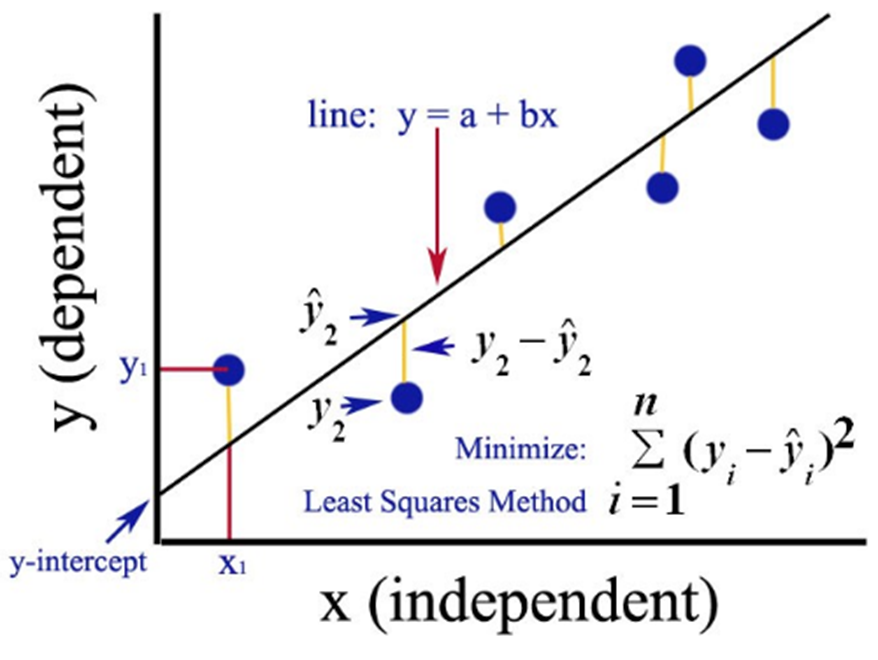

In [2]:
# Ignore non harmful warning
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
# step 1 Data ingestion

In [2]:
import pandas as pd

df = pd.read_csv("50 startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### problem statement = estimate the profit for startup

step 2 - perfom basic data quality checks

In [3]:
df.shape

(50, 5)

In [5]:
# missing values
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [8]:
# drop the duplicates if required
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(50, 5)

# step 3 - EDA (Exploratory Data Analysis)

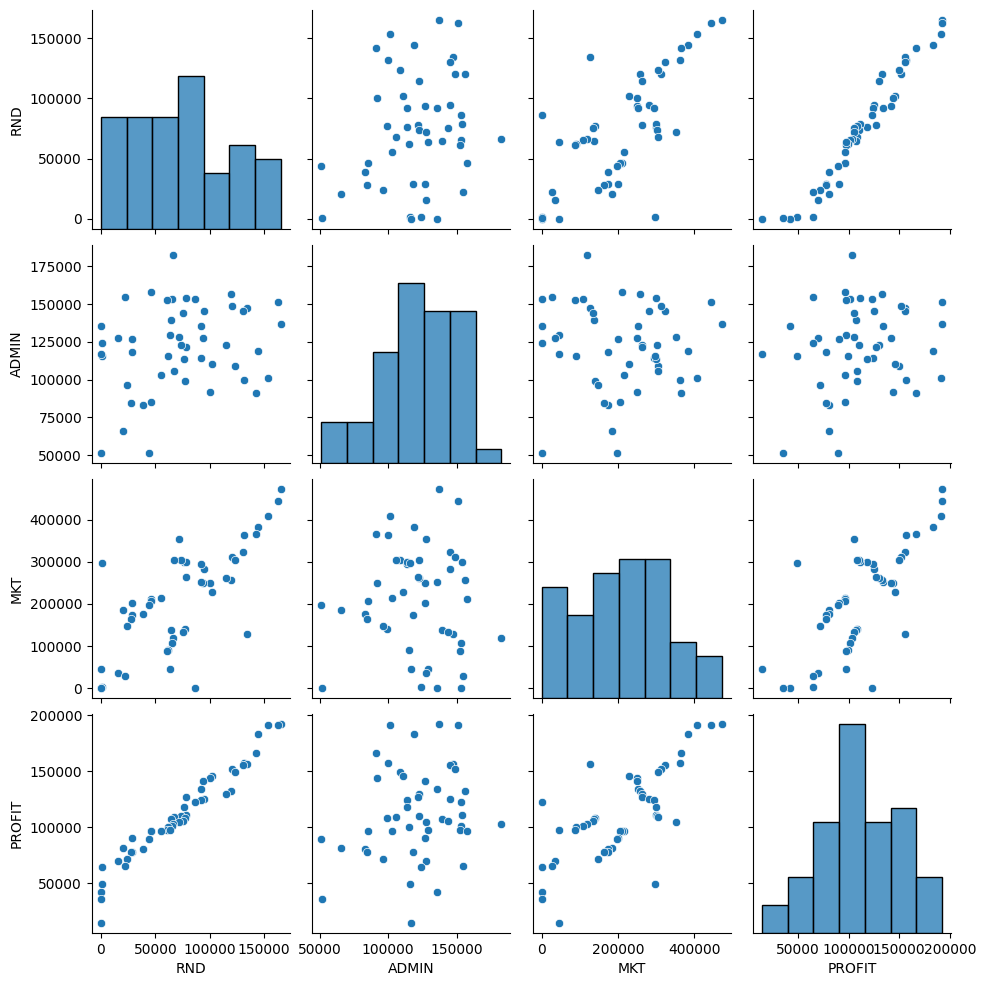

In [9]:
import seaborn as sns

sns.pairplot(data=df)

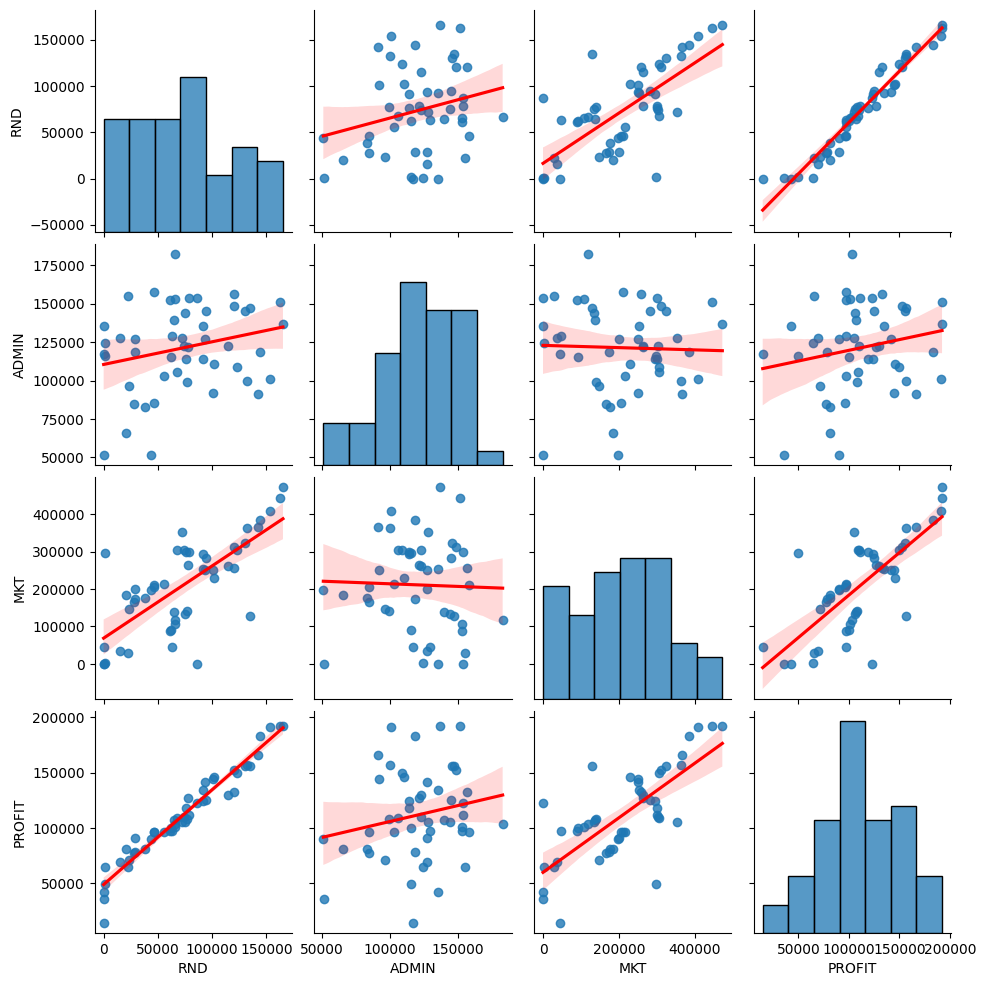

In [10]:
sns.pairplot(data=df, kind="reg", plot_kws={"line_kws": {"color": "red"}})

In [12]:
corr = df.corr(numeric_only=True)
corr

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


<Axes: >

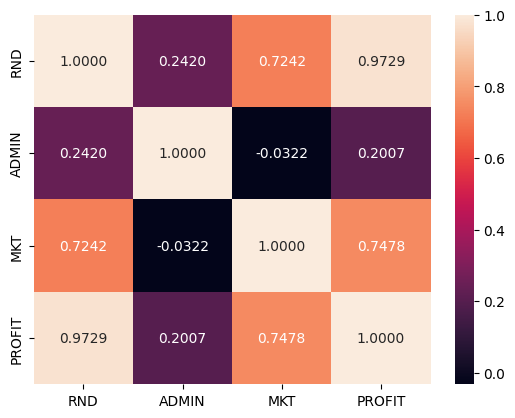

In [13]:
sns.heatmap(data=corr, annot=True, fmt=".4f")

# simple linear regression(1 target feature,1 predictor)

#1. Profit (Target) ~ RND (Predictor)
#2. Profit_pred = B0 + B1*RND
#3. B0 - Intercept
#4. B1 - Coefficient (Slope)

# seperate X and Y

In [14]:
x = df[["RND"]]
y = df[["PROFIT"]]

In [15]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [17]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [18]:
model1.intercept_

array([49032.89914125])

In [19]:
model1.coef_

array([[0.85429137]])

# profit_pred = 49032.90 + 0.8543 x round

# Evaluate the model

In [20]:
# R2 score on data
model1.score(x, y)

0.9465353160804393

<Axes: xlabel='RND', ylabel='PROFIT'>

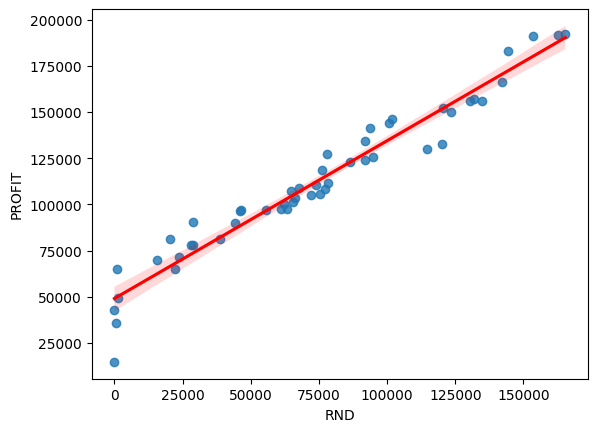

In [22]:
sns.regplot(data=df, x="RND", y="PROFIT", line_kws={"color": "red"})

In [23]:
# predictions given by straight line
preds = model1.predict(x)
preds[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [24]:
y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [25]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
)


def evaluate_model(model, x, y):
    # Predict results for x
    ypred = model.predict(x)
    # Calulate the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print above results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [26]:
evaluate_model(model1, x, y)

RMSE : 9226.10
MAE : 6910.98
MAPE : 11.07%
R2 : 94.65%


# Above clearly shows that model is good and can be used for out of sample prediction

In [27]:
x.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [28]:
x.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [29]:
# estimating profit for any RND value
rnd = 2_50_000
profit_pred = model1.predict([[rnd]])
print(profit_pred)

[[262605.74187595]]


c:\ML12\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
x.describe()

,RND
count,50.000000
mean,73721.615600
std,45902.256482
min,0.000000
25%,39936.370000
50%,73051.080000
75%,101602.800000
max,165349.200000


# Multiple Linear Regression

#Single Target ~ Multiple Predictors (PROFIT ~ RND, ADMIN, MKT)
#PROFIT = B0 + B1xRND + B2xADMIN + B3xMKT


In [33]:
# multiple predictors
x = df[["RND", "ADMIN", "MKT"]]
y = df["PROFIT"]

In [34]:
x.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [35]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: PROFIT, dtype: float64

In [36]:
model2 = LinearRegression()
model2.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
model2.intercept_

np.float64(50122.19298986524)

In [38]:
model2.coef_

array([ 0.80571505, -0.02681597,  0.02722806])

In [39]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [40]:
coefs = pd.Series(model2.coef_, index=x.columns)
coefs

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

#Profit_pred = 50122.19 + 0.8057 x RND -0.0268x ADMIN + 0.0272xMKT

<Axes: >

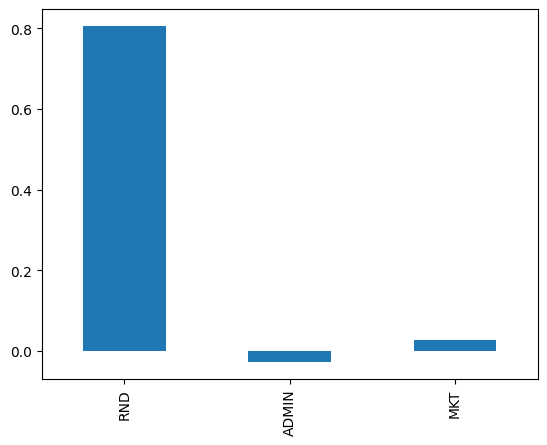

In [42]:
coefs.plot(kind="bar")

In [43]:
# Evaluatate the multiple linear regression model2
evaluate_model(model2, x, y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


#R2 score > 0.8 hence model is good and can be used for out of sample prediction

In [44]:
x.values[0:5]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42]])

In [45]:
x.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [46]:
rnd = 1_20_000
mkt = 30_000
admin = 50_000

profit_pred = model2.predict([[rnd, admin, mkt]])
print(profit_pred)

[146284.04250404]


c:\ML12\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
